In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
from wordcloud import WordCloud

In [52]:
games = pd.read_csv("android-games.csv")

In [53]:
games.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [54]:
games.shape

(1730, 15)

In [55]:
games.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [56]:
#Joining all titles

titles = " ".join(title for title in games.title)

In [57]:
#Creating the Word Cloud

word_cloud = WordCloud(collocations = False, background_color = "white", 
                        width = 3840, height = 2160).generate(titles)

#collocations = False, which will ignore the collocation words from the Text
#background_color = "white", which will make the words look clearer

In [58]:
from PIL import Image
from wordcloud import ImageColorGenerator

In [59]:
#Saving an Image

word_cloud.to_file("Games.png")

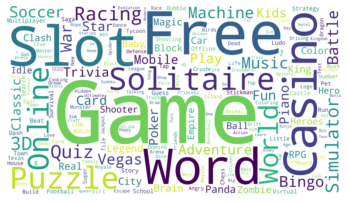

In [60]:
#Display an Image

plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#creating an image with .imshow(), the resampling of the image is done as the image pixel size and 
#screen resolution doesn’t not match. This resampling is controlled with the interpolation argument to
#produce softer or crisper images as per the need. There are several types of interpolation available such as gaussian, quadric, bicubic. Here I am using bilinear interpolation.

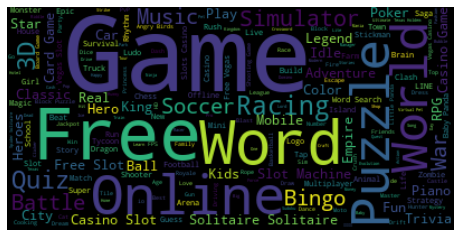

In [61]:
word_cloud = WordCloud().generate(titles)
plt.figure(figsize=[8,10])
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

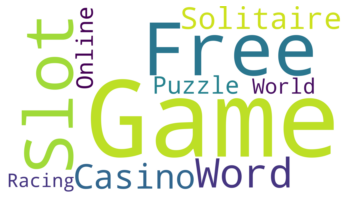

In [62]:
word_cloud = WordCloud(collocations = False, background_color = "white", max_words = 10, 
                        width = 3840, height = 2160).generate(titles)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [63]:
from wordcloud import STOPWORDS

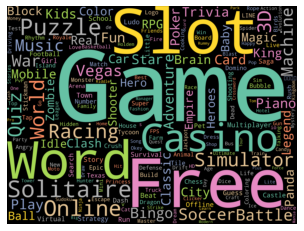

In [64]:
stopwords = set(STOPWORDS)
word_cloud = WordCloud(collocations = False, background_color = "black", colormap = "Set2",
                        random_state = 1, stopwords = STOPWORDS,
                        width = 4000, height = 3000).generate(titles)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#random_state = 1, It will return PIL color for each word, set as an int value. 
#colormap: using this argument we can change each word color.

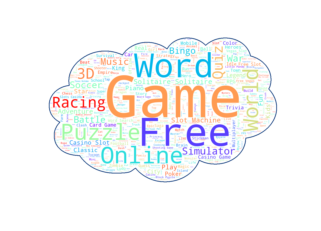

In [65]:
stopwords = set(STOPWORDS)

mask = np.array(Image.open("cloud.png"))

word_cloud = WordCloud(stopwords =stopwords, background_color = "white", mask = mask, max_words = 1000,
                       contour_color = "#023075", contour_width = 3, colormap = "rainbow").generate(titles)
                
plt.figure()
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.savefig("cloud2.png", format="png")
plt.show()

#mask: Specify the shape of the word cloud image. By default, it takes a rectangle.
#contour_width: This parameter creates an outline of the word cloud mask.
#contour_color: contour_color use for the outline color of the mask image. It can be a string or color code.

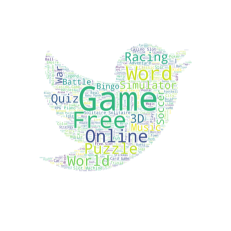

In [66]:
stopwords = set(STOPWORDS)

mask = np.array(Image.open("tw.jpg"))

word_cloud = WordCloud(background_color = "white", max_words = 1000, mask = mask).generate(titles)

plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.savefig("twitter.jpg", format="jpg")
plt.show()